# Ridge Regression

GUEBINCHOI  
3/31/21

> Lasso and Ridge

# 능형회귀

### 다중공선성이 $\hat{\beta}$에 대한 분산과 공분산을 모두 크게한다.

ref: Montgomery, D. C., Peck, E. A., & Vining, G. G. (2021).
Introduction to linear regression analysis. John Wiley & Sons.

아래와 같이 2개의 regressor가 존재하는 모형을 생각하자.

$y_i=\beta_0+\beta_1x_{i1}+\beta_2 x_{i2}+\epsilon_i, \quad \epsilon_i ~ \sim iid N(0,\sigma^2)$

편의상 아래를 가정하자.

$s_y^2=\sum_{i=1}^{n}(y_i-\bar{y})^2=1$

$s_1^2=\sum_{i=1}^{n}(x_{i1}-\bar{x}_1)^2=1$

$s_2^2=\sum_{i=1}^{n}(x_{i2}-\bar{x}_2)^2=1$

최소제곱추정법으로 $\hat{\beta}_1$, $\hat{\beta}_2$를 구하면 아래와
같다.

$\hat{\beta_1}=\frac{r_{1y}-r_{12}r_{2y}}{1-r_{12}^2}$.

$\hat{\beta_2}=\frac{r_{2y}-r_{12}r_{1y}}{1-r_{12}^2}$.

단,

$r_{1y}=\frac{s_{1y}}{\sqrt{s_1^2s_y^2}}=s_{1y}$,
$\quad s_{1y}=\sum_{i=1}^{n}(y_i-\bar{y})(x_{i1}-\bar{x}_1)$

$r_{2y}=\frac{s_{2y}}{\sqrt{s_2^2s_y^2}}=s_{2y}$,
$\quad s_{2y}=\sum_{i=1}^{n}(y_i-\bar{y})(x_{i2}-\bar{x}_2)$

$r_{12}=\frac{s_{12}}{\sqrt{s_1^2s_2^2}}=s_{12}$.
$\quad s_{12}=\sum_{i=1}^{n}(x_{i1}-\bar{x}_1)(x_{i2}-\bar{x}_2)$

(관찰1)

만약에 $x_1$과 $x_2$사이에 강한 선형관계가 있다면 $r_{12}\approx 1$ or
$r_{12}\approx -1$

$\hat{\beta}_1$의 분모 = $1-r_{12}^2 \approx 0$

$\hat{\beta}_1$의 분자 $\approx 0$

$\to$ $\hat{\beta}_1$와 $\hat{\beta}_2$의 값이 불안정할것 같다.

(관찰2)

$\hat{\beta}_1$, $\hat{\beta}_2$의 분산과 공분산을 구해보자.

$\mbox{V}(\hat{\beta_1})=\frac{1}{1-r_{12}^2}\sigma^2$

$\mbox{V}(\hat{\beta_2})=\frac{1}{1-r_{12}^2}\sigma^2$

$\mbox{cov}\big(\hat{\beta}_1,\hat{\beta}_2\big)=\frac{-r_{12}}{1-r_{12}^2}\sigma^2$

(관찰3)

$\mbox{cor}\big(\hat{\beta}_1,\hat{\beta}_2\big)=-r_{12}$

In [1]:
import rpy2 
%load_ext rpy2.ipython

In [2]:
%%R 
set.seed(999)
n<-20000
toeic<-750+rnorm(n,sd=80)
toeic[toeic>990]<-990
toeic<-round(toeic)
teps<-toeic + rnorm(n,sd=0.01)
gpa<-3.5+rnorm(n,sd=0.3)
gpa[gpa>4.5]<-4.5 
gpa<-round(gpa,1)
sal<-gpa*600+toeic*5+rnorm(n,sd=300)
sal<-round(sal)

In [3]:
%%R 
cor(toeic,teps)

[1] 1

(직관)

토익이나 텝스점수나 그게 그거이다. (강한 상관관계)

원래모형은 `연봉=학점*600+토익*5+오차`인데, 토익이나 텝스나 그게
그거이므로, 아래와 같은 모형들도 거의 참모형이라고 생각할 수 있다.

1.  `연봉=학점*600+토익*2+텝스*3+오차`

2.  `연봉=학점*600+토익*1+텝스*4+오차`

3.  `연봉=학점*600+토익*(-5)+텝스*10+오차`

4.  `연봉=학점*600+토익*(-1000)+텝스*(1005)+오차`

5.  `연봉=학점*600+토익*(-10000)+텝스*(10005)+오차`

…

결국에는 토익의 계수와 텝스의 계수를 더해서 5만되면 참모형

In [4]:
%%R 
lm1<-lm(sal~toeic+teps+gpa)
lm1


Call:
lm(formula = sal ~ toeic + teps + gpa)

Coefficients:
(Intercept)        toeic         teps          gpa  
      50.38       194.70      -189.72       590.53  


토익의 계수는 194.70, 텝스의 계수는 -189.72 로 추정되었다. 두개더하면
대략 5.

몇번 더 시도를 해보자.

(시도2)

In [5]:
%%R 
set.seed(1)
n<-20000
toeic<-750+rnorm(n,sd=80)
toeic[toeic>990]<-990
toeic<-round(toeic)
teps<-toeic + rnorm(n,sd=0.01)
gpa<-3.5+rnorm(n,sd=0.3)
gpa[gpa>4.5]<-4.5 
gpa<-round(gpa,1)
sal<-gpa*600+toeic*5+rnorm(n,sd=300)
sal<-round(sal)

In [6]:
%%R 
lm1<-lm(sal~toeic+teps+gpa)
lm1


Call:
lm(formula = sal ~ toeic + teps + gpa)

Coefficients:
(Intercept)        toeic         teps          gpa  
     -45.82       -64.47        69.50       606.31  


이번에는 토익의 계수는 -64.49, 텝스의 계수는 69.50 두개 더하면 대충 5

(시도3)

In [7]:
%%R 
set.seed(2)
n<-20000
toeic<-750+rnorm(n,sd=80)
toeic[toeic>990]<-990
toeic<-round(toeic)
teps<-toeic + rnorm(n,sd=0.01)
gpa<-3.5+rnorm(n,sd=0.3)
gpa[gpa>4.5]<-4.5 
gpa<-round(gpa,1)
sal<-gpa*600+toeic*5+rnorm(n,sd=300)
sal<-round(sal)

In [8]:
%%R 
lm1<-lm(sal~toeic+teps+gpa)
lm1


Call:
lm(formula = sal ~ toeic + teps + gpa)

Coefficients:
(Intercept)        toeic         teps          gpa  
      19.54       217.27      -212.31       603.10  


토익의 계수는 217.27, 텝스의 계수는 -212.31 두개더하면 대충 5

(시도4)

In [9]:
%%R 
set.seed(3)
n<-20000
toeic<-750+rnorm(n,sd=80)
toeic[toeic>990]<-990
toeic<-round(toeic)
teps<-toeic + rnorm(n,sd=0.01)
gpa<-3.5+rnorm(n,sd=0.3)
gpa[gpa>4.5]<-4.5 
gpa<-round(gpa,1)
sal<-gpa*600+toeic*5+rnorm(n,sd=300)
sal<-round(sal)

In [10]:
%%R 
lm1<-lm(sal~toeic+teps+gpa)
lm1


Call:
lm(formula = sal ~ toeic + teps + gpa)

Coefficients:
(Intercept)        toeic         teps          gpa  
     -32.02      -152.82       157.85       600.85  


토익의 계수는 -152.82, 텝스의 계수는 157.85 두개더하면 대충 5.

*\[다중공선성의 특징\]*

1.  추정하는 $\hat{\beta_1}$, $\hat{\beta_2}$가 어떤값일지 거의
    예측안된다.

-   5근처의 값이 나올때도 있고, 30근처의 값이 나오기도 하고, 100근처의
    값이 나오기도 한다.
-   $\hat{\beta}_1$, $\hat{\beta}_2$의 분산이 크다.

1.  그래도 $\hat{\beta}_1+\hat{\beta}_2\approx 5$라는 공통점은 있음.

### 수식적으로 그럴듯해 보여도, 모두 바람직한 모형은 아니다.

아래는 모두 참모형이라고 생각되어지는 상황이다.

1.  $\hat{\beta}_1=2$, $\hat{\beta}_2=3$

2.  $\hat{\beta}_1=5$, $\hat{\beta}_2=0$

3.  $\hat{\beta}_1=10$, $\hat{\beta}_2=-5$

모두 참모형에 가깝지만 상식적으로 (3)은 용납할 수 잆음.

이유1: (3)번과 같은 형태를 허용하면
$\hat{\beta}_1=10000, ~ \hat{\beta}_2=-9995$ 와 같은식으로도 만들수
있음.

이유2: (해석불가능한 모델)

$\hat{\beta}_2$가 의미하는 것은 텝스점수가 얼마나 연봉에 영향을
주는지이다.

즉 텝스점수 1점을 올리면 연봉이 5만원 깍임.

상식적으로 말이 안된다.

### 해결책

논의를 간단하게 하기 위해서 모형을 좀 더 단순화 하자.

`gpa`에 대응하는 계수 600을 우리가 이미 알고있다고 가정하자. (혹은
적절하게 추정했다고 가정하자.)

그리고 오로지 연봉을 토익과 텝스만으로 추정한다고 하자.

단순화된 모형은

`sal-600*gpa = toeic * β1 + teps * β2`

이제 아래와 같이 계수를 추정하였을 경우

1.  $\hat{\beta}_1=2$, $\hat{\beta}_2=3$

2.  $\hat{\beta}_1=5$, $\hat{\beta}_2=0$

3.  $\hat{\beta}_1=10$, $\hat{\beta}_2=-5$

(3)과 같은 상황이 발생하지 않도록 하여보자.

In [11]:
%%R 
set.seed(2)
n<-20000
toeic<-750+rnorm(n,sd=80)
toeic[toeic>990]<-990
toeic<-round(toeic)
teps<-toeic + rnorm(n,sd=0.01)
gpa<-3.5+rnorm(n,sd=0.3)
gpa[gpa>4.5]<-4.5 
gpa<-round(gpa,1)
sal<-gpa*600+toeic*5+rnorm(n,sd=300)
sal<-round(sal)

In [12]:
%%R
y<-sal-600*gpa
lm(y~toeic+teps-1)


Call:
lm(formula = y ~ toeic + teps - 1)

Coefficients:
 toeic    teps  
 216.9  -211.9  


$\hat{\beta}_1=216.9$

$\hat{\beta}_2=-211.9$

위의 결과는 $L(\beta)$를 최소화하는 $\beta$를 구한 결과임

In [13]:
%%R 
X<-cbind(toeic,teps)
L<-function(beta){
    t(y-X%*%beta)%*%(y-X%*%beta)
}

In [14]:
%%R
beta<-c(216.9,-211.9)
c<-L(beta)

즉 $c=1798374986$이 $L$이 가질수 있는 최소값.

In [15]:
%%R
beta1<-c(2,3)
L1<-L(beta1)/c
beta2<-c(5,0)
L2<-L(beta2)/c
beta3<-c(10,-5)
L3<-L(beta3)/c
beta4<-c(104,-100)
L4<-L(beta4)/c
c(L1,L2,L3,L4)

[1] 1.000052 1.000050 1.000048 7.321030

1.  $\hat{\beta}_1=2$, $\hat{\beta}_2=3$ $\longrightarrow$
    $L(\boldsymbol{\beta})=1.000052$

2.  $\hat{\beta}_1=5$, $\hat{\beta}_2=0$ $\longrightarrow$
    $L(\boldsymbol{\beta})=1.000050$

3.  $\hat{\beta}_1=10$, $\hat{\beta}_2=-5$ $\longrightarrow$
    $L(\boldsymbol{\beta})=1.000048$

4.  $\hat{\beta}_1=104$, $\hat{\beta}_2=-100$ $\longrightarrow$
    $L(\boldsymbol{\beta})=7.321030$

이대로라면 위의 (1)-(4) 중에서 가장 적절한 해는 (3)이다.

`아이디어:` $L(\beta)$을 조금 바꾸자. 위의 손실함수에서 각각
$\frac{1}{100000}\big(\beta_1^2+\beta_2^2\big)$를 더한다면?

In [16]:
%%R
beta1<-c(2,3)
beta2<-c(5,0)
beta3<-c(10,-5)
beta4<-c(104,-100)
p1<-(beta1[1]^2+beta1[2]^2)/100000
p2<-(beta2[1]^2+beta2[2]^2)/100000
p3<-(beta3[1]^2+beta3[2]^2)/100000
p4<-(beta4[1]^2+beta4[2]^2)/100000

L1<-L(beta1)/c+p1
L2<-L(beta2)/c+p2
L3<-L(beta3)/c+p3
L4<-L(beta4)/c+p4
c(L1,L2,L3,L4)

[1] 1.000182 1.000300 1.001298 7.529190

1.  $\hat{\beta}_1=2$, $\hat{\beta}_2=3$ $\longrightarrow$
    $L(\boldsymbol{\beta})=1.000182$

2.  $\hat{\beta}_1=5$, $\hat{\beta}_2=0$ $\longrightarrow$
    $L(\boldsymbol{\beta})=1.000300$

3.  $\hat{\beta}_1=10$, $\hat{\beta}_2=-5$ $\longrightarrow$
    $L(\boldsymbol{\beta})=1.001298$

4.  $\hat{\beta}_1=104$, $\hat{\beta}_2=-100$ $\longrightarrow$
    $L(\boldsymbol{\beta})=7.529190$

이렇게하면 이제 (수정된) $L$을 최소화하는 해는 (1)이다.

### 해결책의 시각적 이해

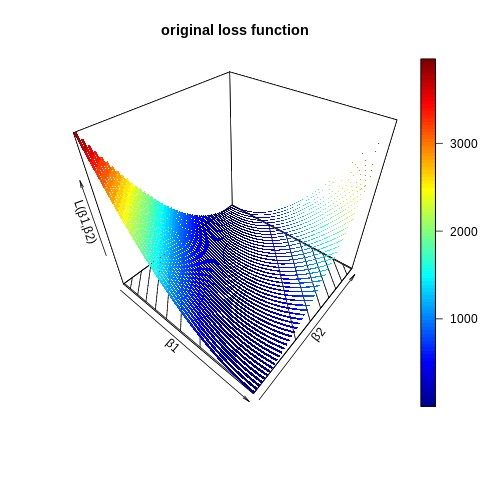

In [19]:
%%R
β1 = seq(-10,15,length=50)
β2 = seq(-10,15,length=50)
L_ <- function(β1,β2){
    rtn<-c()
    for(k in 1:length(β2)){
        rtn[k]<-sum((y-β1[k]*toeic-β2[k]*teps)^2)/c
    }
    rtn
}
z_=outer(β1,β2,L_)
#install.packages("plot3D")
library(plot3D) 
ribbon3D(z=z_,contour=TRUE,xlab="β1",ylab="β2",zlab="L(β1,β2)",main="original loss function")

In [ ]:
%%R
β1 = seq(-10,15,length=50)
β2 = seq(-10,15,length=50)
panelty_<-function(β1,β2){
    λ<-1.5 # 1/100000
    rtn<-c()
    for(k in 1:length(β2)){
        rtn[k]<-λ*sum(β1[k]^2+β2[k]^2)
    }
    rtn    
}

L_ <- function(β1,β2){
    rtn<-c()
    for(k in 1:length(β2)){
        rtn[k]<-sum((y-β1[k]*toeic-β2[k]*teps)^2)/c
    }
    rtn
}
z_=outer(β1,β2,L_)
z__=outer(β1,β2,panelty_)
#install.packages("plot3D")
library(plot3D) 
ribbon3D(z=z_,contour=TRUE,xlab="β1",ylab="β2",main="그림1: L(β1,β2)")
ribbon3D(z=z__,contour=TRUE,xlab="β1",ylab="β2",main="그림2: λ(β1^2+β2^2)")
ribbon3D(z=z_+z__,contour=TRUE,xlab="β1",ylab="β2",main="그림3: L(β1,β2)+λ(β1^2+β2^2)")

### $\lambda$의 역할 $(\lambda>0)$

\[그림1\]이랑 \[그림2\]을 섞어서 \[그림3\]을 만드는데, 각각을 얼만큼의
비율로 섞을지 결정한다.

람다가 크면 그림2를 많이 반영한다. $\to$ 람다가 너무 크면 결국
$\hat{\beta}_1$와 $\hat{\beta}_2$의 추정값이 거의 0에 가깝게 된다.

람다가 작으면 그림1을 많이 반영한다. $\to$ 람다가 너무 작게되면, 우리는
손실함수 $L(\beta_1,\beta_2)$에 아무런 수정도 하지않은 셈이된다.

### $\lambda(\beta_1^2+\beta_2^2)$의 역할

원래 $\beta_1+\beta_2=5$를 만족하는 어떠한 해도 솔루션이 되었음. 즉
\[그림1\]과 같은 상황

\[그림1\]과 같은 상황에서 약간의 경사를 주어서 \[그림3\]과 같은 상황을
만듬

$\hat{\beta}_1$ 와 $\hat{\beta}_2$ 의 값을 안정적으로 만들어 준다.

그러면서도 딱히 원래 $L(\beta_1,\beta_2)$의 모양을 크게 해치지 않는다.

(!) 그럴듯함. 우리가 원하는것 같다.

이렇게 하면 다중공선성이 발생하는 상황에서 적절한 해를 구할 수 있을 것
같다.

(관찰)

$\lambda\big(\beta_1^2+\beta_2^2\big)$은 아래와 같이 표현가능함.

$\lambda [\beta_1,\beta_2]\begin{bmatrix}\beta_1 \\ \beta_2 \end{bmatrix}=\lambda\beta^\top \beta$

단, $\beta=\begin{bmatrix}\beta_1 \\ \beta_2 \end{bmatrix}$.

### 릿지에 대한 책의 설명들..

Step 1.
$\hat{\beta}^R=\bf\big(X^\top X+\lambda I \big)^{-1}{\bf X}^\top y$.

일반적인 회귀분석과 다르게 아래와 같은 손실함수를 생각하자.

$L={\bf (y-X\beta)^\top}{\bf (y-X\beta)}+\lambda \beta^\top \beta=\mbox{goodness of fit} + \mbox{panalty}$

$L$를 최소화하는 $\hat{\beta}$을 구하면 아래와 같다. 구분을 위해서
$\hat{\beta}^R$이라는 기호를쓰자.

$\hat{\beta}^R=\bf\big(X^\top X+\lambda I \big)^{-1}{\bf X}^\top y$

Step 2 : $\hat{\beta}^R$이 $\hat{\beta}^{OLS}$보다 왜 좋은가?

$\hat{\beta}^{OLS}={\bf (X^\top X)^{-1}X^\top y}$

$\hat{\beta}^{R}={\bf (X^\top X+\lambda I)^{-1}X^\top y}$

1.  $\hat{\beta}^{OLS}$는 $\beta$에 대한 불편추정량 이지만,
    $\hat{\beta}^{R}$은 아니다.

2.  하지만 분산은 $\hat{\beta}^{OLS}$보다 $\hat{\beta}^R$이 더 작다.

3.  좋은 추정량은 bias와 분산이 모두 작아야하는데, $\hat{\beta}^{R}$은
    바이어스는 $\hat{\beta}^{OLS}$보다 큰 상황이고, 분산은
    $\hat{\beta}^{OLS}$보다 작은 상황이다.

4.  따라서 두 추정치중에서 뭐가 더 좋다고 말하기 애매한데, 이를 명확하게
    말하기 위해서는 MSE($=\mbox{bias}^2 + \mbox{variance}$)를
    비교해봐야한다.

5.  Hoerl 과 Kennard는 $\hat{\beta}^{R}$이 $\hat{\beta}^{OLS}$보다 MSE가
    작게되는 $\lambda$값이 항상 존재한다고 한다고 밝혔다. (1970년)

6.  따라서 이러한 $\lambda$를 잘 찾으면 항상 Ridge Regression이 Linear
    Regression 보다 좋다고 주장할 수 있다.

(참고)

1.  일반적인 손실함수 $L={\bf (y-X\beta)^\top (y-X\beta)}$와 수정된
    손실함수를 구분하기 위해서 아래와 같이 $\tilde{L}$와 같은 기호를
    쓰기도 한다.

$\tilde{L}={\bf(y-X\beta)^\top(y-X\beta)+\lambda \beta^\top \beta }$

1.  일반적인 손실함수 $L$을 최소화하는 $\beta$와 수정된 손실함수
    $\tilde{L}$을 최소화하는 $\beta$를 구분하기 위해서 아래와 같은
    기호를 쓰기도 한다.

$\hat{\beta}^{OLS}={\bf (X^\top X)^{-1}X^\top y}$

$\hat{\beta}^{R}={\bf (X^\top X+\lambda I)^{-1}X^\top y}$

1.  $\lambda \beta^\top \beta$를 패널티항(=벌점항), $L_2$-패널티,
    regularization term (정규화항) 이라고 부른다.

2.  $\lambda \beta^\top \beta$를 $\lambda \|\beta\|_2^2$로 표현하기도
    한다. $\| \cdot \|_2$는 벡터의 $L_2$-노름 이라고 한다.

-   ${\bf x}=(x_1,x_2)$ $\to$ $\|{\bf x}\|_2^2:=x_1^2+x_2^2$,
    $\|{\bf x}\|_2:=\sqrt{x_1^2+x_2^2}$
-   $\lambda \beta^\top \beta = \lambda(\beta_1^2+\beta_2^2)$

1.  (4)에서 유리하여 $\lambda \beta^\top \beta$를 $L_2$-패널티항이라고
    부르기도 한다.

2.  참고로 $L_1$-패널티항도 있다. 그리고 $L_1$과 $L_2$패널티를 섞어서
    쓰는 방법도 있다.

-   $Loss=SSE+L_2\mbox{-}panalty$: Ridge
-   $Loss=SSE+L_1\mbox{-}panalty$: Lasso
-   $Loss=SSE+L_1\mbox{-}panalty+L_2\mbox{-}panalty$: Elastic-net

1.  $L_2$-패널티항은 너무 큰 $\beta_1,\beta_2$를 구할때 패널티를
    부여하여 되도록이면 작은 $\beta_1,\beta_2$을 선택하게끔 `제약`을
    건다.

2.  일반적인 손실함수 $L$이지만 우리는 $\tilde{L}$을 최소화해야
    하므로 (i) 되도록이면 $\beta_1,\beta_2$의 값이 작을수록 좋다는
    제약하에서 (ii) $L$를 최소화하는 2가지 역할을 수행해야 한다.

3.  $\tilde{L}$를 최소화하는 문제를 `제약된 조건하에서의 최소화문제`라고
    표현한다.

4.  (8)에서 (i)-(ii)의 역할중에서 어떤것을 더 중시할지 조율하는 역할을
    $\lambda$가 하는데, 이와 같은 이유로 $\lambda$를 조율모수 (tuning
    parameter)라고 부르기도 한다.

5.  $\lambda$를 하이퍼파라메터라고 부르기도 한다.

6.  $\hat{\beta}^{R}$의 값은 대체적으로 $\hat{\beta}^{OLS}$보다 작은값을
    가진다. 이러한 이유로 $\beta^{R}$ shrinkage esitmator라고 부른다.

7.  biased regression, shrinkage method, regularization method, panalty
    method.. 등 ridge를 표현하는 방법들은 다양하다.

8.  능형회귀를 수행함에 있어서 (이론적인 부분에서는 언급되지 않았으나)
    변수의 표준화를 먼저 시행해야 한다.